# Imports

In [1]:
import os
import h5py
import numpy as np
from tensorflow.keras import utils
import pylab as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from PIL import Image

# Prepare data
Load the images and labels from dataset file h5 that contains multidimensional arrays

In [2]:
if not os.path.isfile('Galaxy10_DECals.h5'):
    url = 'https://astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5'
    print("ERROR: download dataset from: ", url)

In [3]:
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

print('Data loaded successfully')

# Galaxy10 dataset (21785 images)
# ├── Class 0: Disk, Face-on, No Spiral
# ├── Class 1: Smooth, Completely round
# ├── Class 2: Smooth, in-between round
# ├── Class 3: Smooth, Cigar shaped
# ├── Class 4: Disk, Edge-on, Rounded Bulge
# ├── Class 5: Disk, Edge-on, Boxy Bulge
# ├── Class 6: Disk, Edge-on, No Bulge
# ├── Class 7: Disk, Face-on, Tight Spiral
# ├── Class 8: Disk, Face-on, Medium Spiral
# └── Class 9: Disk, Face-on, Loose Spiral
class_names = ['Disk-Face_on-No_Spiral', 'Smooth-Completely-round', 'Smooth-in_between-round', 
               'Smooth-Cigar_shaped', 'Disk-Edge_on-Rounded_Bulge', 'Disk-Edge_on-Boxy_Bulge', 
               'Disk-Edge_on-No_Bulge', 'Disk-Face_on-Tight_Spiral', 'Disk-Face_on-Medium_Spiral', 
               'Disk-Face_on-Loose_Spiral']

Data loaded successfully


# Inspect dataset
Inspect 10 images

Images index to display: [  426  1724  7775 16408   466 14938 14244  9705  2784 14498]


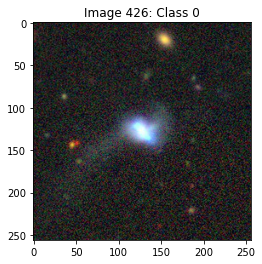

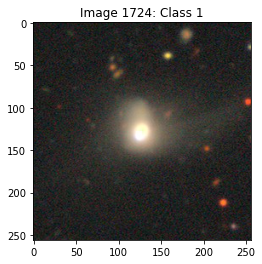

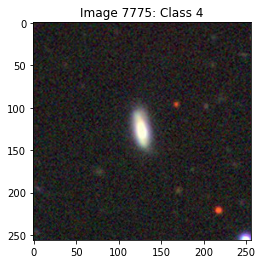

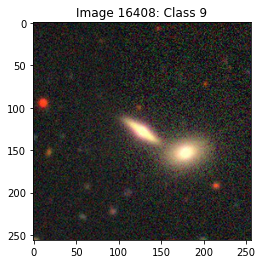

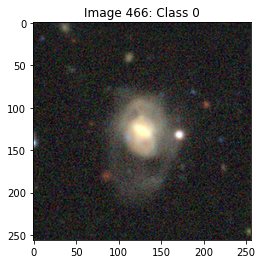

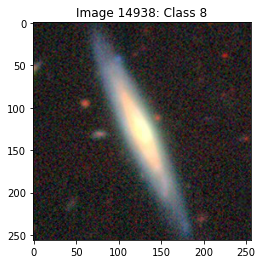

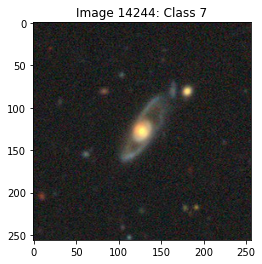

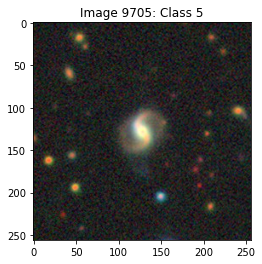

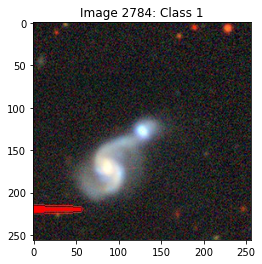

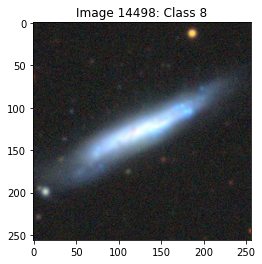

In [4]:
img = None
plt.ion()
samples = np.random.randint(0, labels.shape[0], size=10)
print('Images index to display:', samples)
for i in samples:
    img = plt.imshow(images[i])
    plt.title('Image {}: Class {}'.format(i, labels[i]))
    plt.draw()
    plt.pause(2.)
plt.close('all')

To convert the labels to categorical 10 classes. 
Categorical format is required for training

In [5]:
labels_cat = utils.to_categorical(labels, 10)
print('Categorical label:', labels_cat[0])
print('Shape of data structure labels {} and images {}'.format(labels_cat.shape, images.shape))

Categorical label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of data structure labels (17736, 10) and images (17736, 256, 256, 3)


Trivial data exploration. Data is unbalanced

In [6]:
print('Dataset images per class:', np.sum(labels_cat, axis=0))

Dataset images per class: [1081. 1853. 2645. 2027.  334. 2043. 1829. 2628. 1423. 1873.]


## Split the dataset into training and testing set (RANDOMLY)

In [7]:
train_idx, test_idx = train_test_split(np.arange(labels_cat.shape[0]), test_size=0.2)
train_labels = labels_cat[train_idx]
test_labels = labels_cat[test_idx]
print('Train - images per class:', np.sum(train_labels, axis=0))
print('Test - images per class:', np.sum(test_labels, axis=0))

Train - images per class: [ 860. 1508. 2116. 1607.  272. 1628. 1479. 2087. 1132. 1499.]
Test - images per class: [221. 345. 529. 420.  62. 415. 350. 541. 291. 374.]


## Partitions keeping classes ratio - Stratified partitions

In [8]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_idx, test_idx in sss.split(labels, labels):
    train_labels = labels_cat[train_idx]
    test_labels = labels_cat[test_idx]
    print("TRAIN indexes:", train_idx, "number of objects:", train_idx.shape)
    print(np.sum(train_labels, axis=0))
    print("TEST indexes:", test_idx, "number of objects:", test_idx.shape)
    print(np.sum(test_labels, axis=0))
train_labels = labels[train_idx]
test_labels = labels[test_idx]
train_images = images[train_idx]
test_images = images[test_idx]

TRAIN indexes: [14233  4138  8097 ...  5841  9187  5420] number of objects: (14188,)
[ 865. 1482. 2116. 1622.  267. 1634. 1463. 2102. 1139. 1498.]
TEST indexes: [13162   478  8926 ...  2103 14164 15856] number of objects: (3548,)
[216. 371. 529. 405.  67. 409. 366. 526. 284. 375.]


## Automatic train-val data dump from partitions
1. Create directory tree and save images

2. Train partition

3. Validation partition

In [9]:
main = os.getcwd()

# 1.Create directory tree and save images
dataset_dirname = 'Galaxy10'
try:
    os.mkdir(dataset_dirname)
except OSError:
    print('OSError: Creating or already exists the directory')
# Main dataset folder
os.chdir(dataset_dirname)

# 2.Train partition
os.mkdir('train')
os.chdir('train')
for cls in class_names:   # for each class 'cls'
    os.mkdir(cls)
    # train/<class> folder save images
    cls_int = class_names.index(cls)
    print('Train - Class: ', cls)
    for i in range(len(train_labels)):   # traverse all train lavels
        if train_labels[i] == cls_int:   # save instance 'i' belong to class 'cls'
            img_path = os.path.join(os.getcwd(), cls)
            #print('Save image {} in {}'.format(i, img_path))
            img = Image.fromarray(train_images[i])
            img.save(os.path.join(img_path, 'galaxy10_img{}.jpg'.format(i)))

# 3.Validation partition
os.chdir(os.path.join(main, dataset_dirname))
os.mkdir('val')
os.chdir('val')
for cls in class_names:
    os.mkdir(cls)
    # val/<class> folder save images
    cls_int = class_names.index(cls)
    print('Validation - Class: ', cls)
    for i in range(len(test_labels)):   # traverse all train lavels
        if test_labels[i] == cls_int:   # save instance 'i' belong to class 'cls'
            img_path = os.path.join(os.getcwd(), cls)
            #print('Save image {} in {}'.format(i, img_path))
            img = Image.fromarray(test_images[i])
            img.save(os.path.join(img_path, 'galaxy10_img{}.jpg'.format(i)))

os.chdir(main)

Train - Class:  Disk-Face_on-No_Spiral
Train - Class:  Smooth-Completely-round
Train - Class:  Smooth-in_between-round
Train - Class:  Smooth-Cigar_shaped
Train - Class:  Disk-Edge_on-Rounded_Bulge
Train - Class:  Disk-Edge_on-Boxy_Bulge
Train - Class:  Disk-Edge_on-No_Bulge
Train - Class:  Disk-Face_on-Tight_Spiral
Train - Class:  Disk-Face_on-Medium_Spiral
Train - Class:  Disk-Face_on-Loose_Spiral
Validation - Class:  Disk-Face_on-No_Spiral
Validation - Class:  Smooth-Completely-round
Validation - Class:  Smooth-in_between-round
Validation - Class:  Smooth-Cigar_shaped
Validation - Class:  Disk-Edge_on-Rounded_Bulge
Validation - Class:  Disk-Edge_on-Boxy_Bulge
Validation - Class:  Disk-Edge_on-No_Bulge
Validation - Class:  Disk-Face_on-Tight_Spiral
Validation - Class:  Disk-Face_on-Medium_Spiral
Validation - Class:  Disk-Face_on-Loose_Spiral


# Imports

In [10]:
from __future__ import print_function, division

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
from random import shuffle

torch.manual_seed(0)

# Prepare functions

In [11]:
##### Function visualizes a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [12]:
##### Function shows the model predictions
def visualize_results(model, classnames, num_images=6):
    plt.ion()
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            indx = list(range(inputs.size()[0]))
            shuffle(indx)
            for j in indx:
                images_so_far += 1
                title = 'Image {}: class <{}> predicted <{}>'.format(j, classnames[labels[j]], classnames[preds[j]])
                imshow(inputs.cpu().data[j], title)
                plt.pause(2.5)

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return

        model.train(mode=was_training)
        plt.close()

In [13]:
##### Function for training and evaluate a model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    r"""	Support function for model training.
    Args:
    model: Model to be trained
    criterion: Optimization criterion (loss)
    optimizer: Optimizer to use for training
    scheduler: Instance of ``torch.optim.lr_scheduler``
    num_epochs: Number of epochs
    Return:
    model: most accurate model at accuracy meassure
    <list>: epoch number iterations
    <<list>,<list>>: training loss and accuracy iterations
    <<list>,<list>>: val loss and accuracy iterations
    """

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_lst = []
    trn_loss_lst = []
    trn_acc_lst = []
    val_loss_lst = []
    val_acc_lst = []

    for epoch in range(num_epochs):
        print('-' * 10)
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data batches
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # save training val metadata metrics
            if phase == 'train':
            	epoch_lst.append(epoch)
            	trn_loss_lst.append(np.round(epoch_loss, 4))
            	trn_acc_lst.append(np.round(epoch_acc.cpu().item(), 4))
            elif phase == 'val':
            	val_loss_lst.append(np.round(epoch_loss, 4))
            	val_acc_lst.append(np.round(epoch_acc.cpu().item(), 4))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    trn_metadata = [trn_loss_lst, trn_acc_lst]
    val_metadata = [val_loss_lst, val_acc_lst]

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_lst, trn_metadata, val_metadata

In [14]:
##### Plot training-validation metadata metrics
def draw_metric(iters, trn_list, val_list, title):
    plt.plot(iters, trn_list, '-b', label='train')
    plt.plot(iters, val_list, '-r', label='val')

    plt.xlabel("n iteration")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image and clean plot
    plt.savefig(os.path.join(title+".png"))
    plt.clf()
    from IPython.display import Image, display
    display(Image(filename=title+".png"))

# Hyperparameters

In [15]:
# Path where dataset is stored
dataset_dir = 'Galaxy10'

training_epochs = 20
schedule_steps = 50
learning_rate = 0.001
batch_size = 32

# Data preparation

In [16]:
# Data augmentation
# Artificial data generation from original data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Helper for reading dataset folders
image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), data_transforms[x])
                  for x in ['train', 'val']}

# Helper that handle folder reader: folders [train, test]
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
print('Loaded dataset partitions size:', dataset_sizes)
print('Loaded dataset classes:', class_names)

Loaded dataset partitions size: {'train': 14188, 'val': 3548}
Loaded dataset classes: ['Disk-Edge_on-Boxy_Bulge', 'Disk-Edge_on-No_Bulge', 'Disk-Edge_on-Rounded_Bulge', 'Disk-Face_on-Loose_Spiral', 'Disk-Face_on-Medium_Spiral', 'Disk-Face_on-No_Spiral', 'Disk-Face_on-Tight_Spiral', 'Smooth-Cigar_shaped', 'Smooth-Completely-round', 'Smooth-in_between-round']


In [17]:
# Device for the computational load
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Select ONE model initialization only:
    1. TRAINING FROM SCRATCH
    2. TRANSFER LEARNING AND FINE TUNNING

## 1. TRAINING FROM SCRATCH

In [18]:
# Model initialization (first time required download)
model_ft = models.resnet50(pretrained=False)

model_ft = model_ft.to(device)

## 2.TRANSFER LEARNING AND FINE TUNNING

In [19]:
# Model initialization
model_ft = models.resnet50(pretrained=True)
# Finetunning and freeze as fixed feature extractor
for param in model_ft.parameters():
    param.requires_grad = False
    
# Create a new layer module for classification (requires_grad=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

In [20]:
# Optimization Loss function
criterion = nn.CrossEntropyLoss()

# Parameters and optimization rate
optimizer_ft = optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)

# Decay LR by a factor of 0.1 every <schedule_steps> epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=schedule_steps, gamma=0.1)

## Training and evaluation

MSI GT72VR 7RE - NVIDIA GeForce GTX 1070

In [21]:
model_ft, epc, trn, val = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, 
                                      num_epochs=training_epochs)

----------
Epoch 1/20
train Loss: 1.8485 Acc: 0.3511
val Loss: 1.5700 Acc: 0.4662
----------
Epoch 2/20
train Loss: 1.6210 Acc: 0.4328
val Loss: 1.5292 Acc: 0.4518
----------
Epoch 3/20
train Loss: 1.5658 Acc: 0.4387
val Loss: 1.4772 Acc: 0.4715
----------
Epoch 4/20
train Loss: 1.5423 Acc: 0.4454
val Loss: 1.4611 Acc: 0.4698
----------
Epoch 5/20
train Loss: 1.5403 Acc: 0.4422
val Loss: 1.4525 Acc: 0.4744
----------
Epoch 6/20
train Loss: 1.5340 Acc: 0.4471
val Loss: 1.4282 Acc: 0.4811
----------
Epoch 7/20
train Loss: 1.5228 Acc: 0.4534
val Loss: 1.4582 Acc: 0.4713
----------
Epoch 8/20
train Loss: 1.5009 Acc: 0.4633
val Loss: 1.4203 Acc: 0.4935
----------
Epoch 9/20
train Loss: 1.4911 Acc: 0.4638
val Loss: 1.3805 Acc: 0.5099
----------
Epoch 10/20
train Loss: 1.4842 Acc: 0.4675
val Loss: 1.3839 Acc: 0.5093
----------
Epoch 11/20
train Loss: 1.4838 Acc: 0.4622
val Loss: 1.3828 Acc: 0.4941
----------
Epoch 12/20
train Loss: 1.4749 Acc: 0.4651
val Loss: 1.3769 Acc: 0.5099
----------
Ep

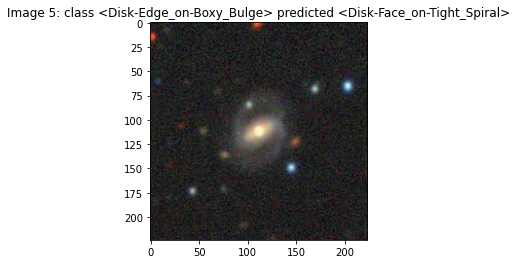

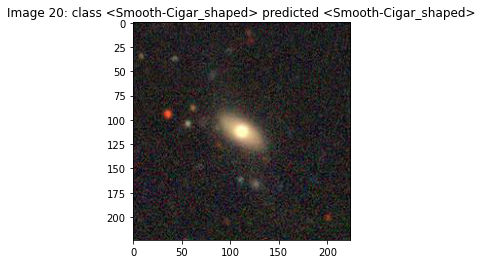

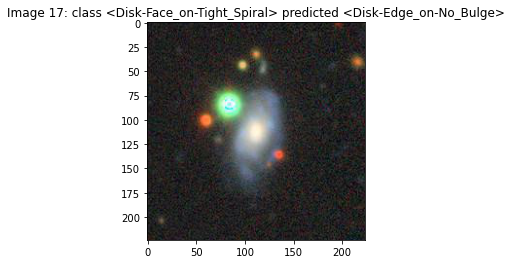

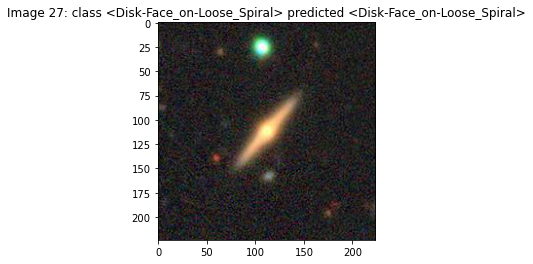

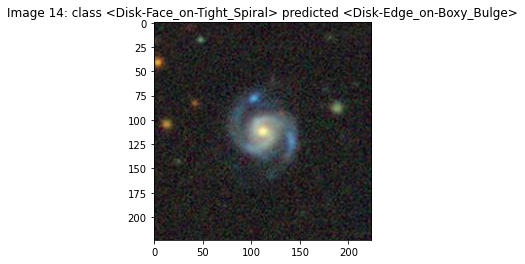

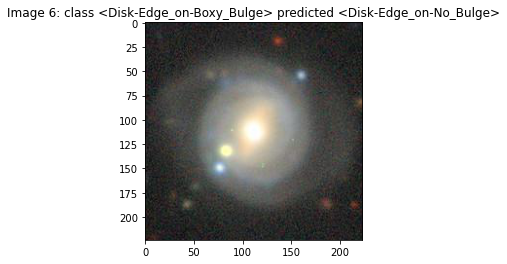

In [22]:
# model_ft is the best trained model
visualize_results(model_ft, class_names, num_images=6)

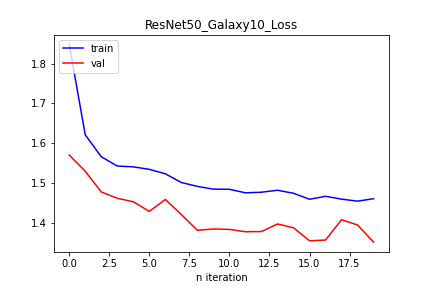

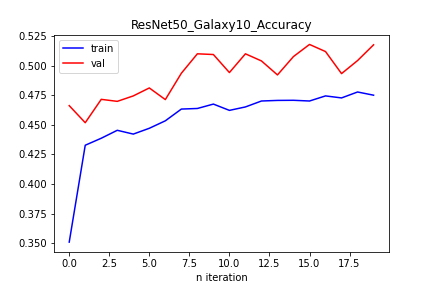

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot loss and accuracy metric in graphics
draw_metric(epc, trn[0], val[0], 'ResNet50_Galaxy10_Loss')
draw_metric(epc, trn[1], val[1], 'ResNet50_Galaxy10_Accuracy')

In [24]:
# Save model in file for future inference
path = 'resnet50_galaxy10.pth'
torch.save(model_ft.state_dict(), path)

# Inference loading pretrained model

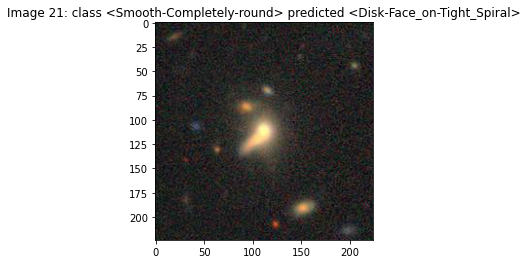

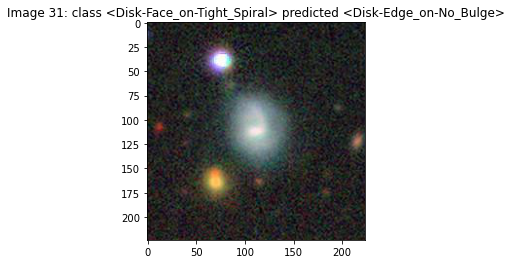

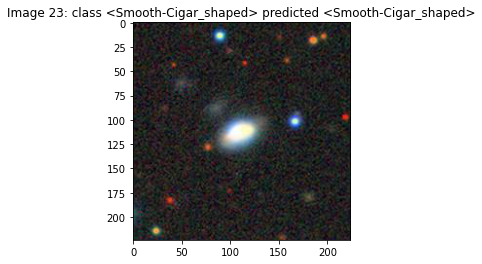

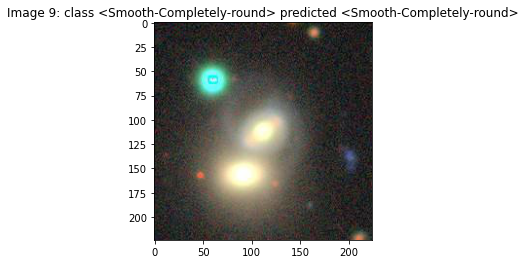

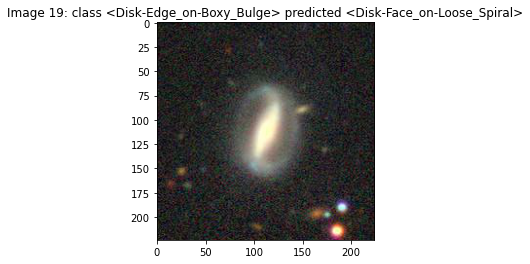

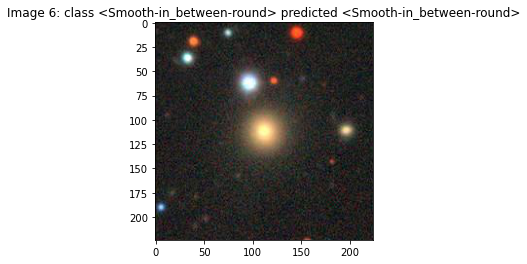

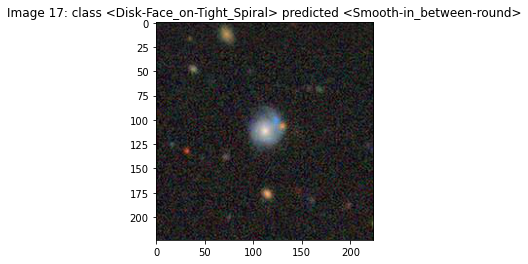

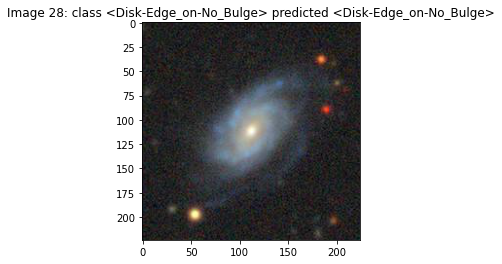

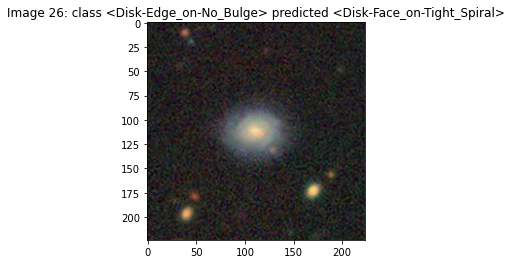

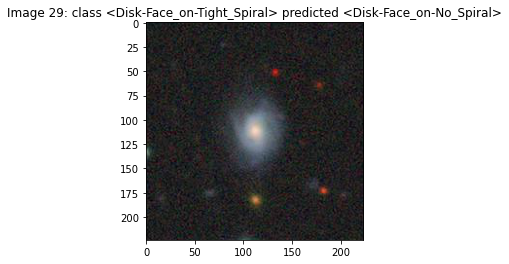

In [25]:
# Load model and perform inference
path = 'resnet50_galaxy10.pth'
model_ft.load_state_dict(torch.load(path))

# Show some results
visualize_results(model_ft, class_names, num_images=10)